# Using AutoML to Predict Fish Stock

Here we use the automlx library to run AutoML on our prepared dataset for modelling observed fish stock. 

## Load Dependencies

In [2]:
import ads
import automlx
import pandas as pd
from ads.dataset.dataset import ADSDataset
from ads.dataset.factory import DatasetFactory
from automlx import init

In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

## Load Data

In [4]:
train = pd.read_csv('./prepared_data/train.csv')
test = pd.read_csv('./prepared_data/test.csv')

In [5]:
train.head()

,EVENT_DATE_YEAR,SURVEY_RANKED_EASTING,SURVEY_RANKED_NORTHING,FISHED_AREA,AREA_DART,AREA_EXE,AREA_PLYM,AREA_TEIGN,SPECIES_SEA_TROUT,SPECIES_BULLHEAD,...,SURVEY_METHOD_DC_ELECTRIC_FISHING_SINGLE_CATCH,SURVEY_METHOD_ELECTRIC_FISHING_DEPLETION_SAMPLE,SURVEY_METHOD_ELECTRIC_FISHING_TSAMPLE,SURVEY_METHOD_ELECTRIC_FISHING_SINGLE_CATCH,SURVEY_METHOD_PDC_ELECTRIC_FISHING_TSAMPLE,SURVEY_METHOD_PDC_ELECTRIC_FISHING_SINGLE_CATCH,OBSERVED,SEASON_SUMMER,SEASON_AUTUMN,LOG_OBSERVED
0,-0.127746,0.352584,-1.076938,-0.410373,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,60.0,1.0,0.0,4.110874
1,0.806263,0.765311,0.918672,-0.107021,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,85.0,1.0,0.0,4.454347
2,1.428936,-1.544878,-1.071694,-0.741766,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,1.098612
3,0.806263,1.116206,0.109802,2.076609,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,154.0,1.0,0.0,5.043425
4,-0.439082,0.069703,0.959919,0.644318,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [6]:
train.keys()

Index(['EVENT_DATE_YEAR', 'SURVEY_RANKED_EASTING', 'SURVEY_RANKED_NORTHING',
       'FISHED_AREA', 'AREA_DART', 'AREA_EXE', 'AREA_PLYM', 'AREA_TEIGN',
       'SPECIES_SEA_TROUT', 'SPECIES_BULLHEAD', 'SPECIES_EUROPEAN_EEL',
       'SPECIES_LAMPREY', 'SPECIES_MINNOW', 'SPECIES_OTHER',
       'SPECIES_STONE_LOACH', 'SURVEY_METHOD_AC_ELECTRIC_FISHING_SINGLE_CATCH',
       'SURVEY_METHOD_DC_ELECTRIC_FISHING_TSAMPLE',
       'SURVEY_METHOD_DC_ELECTRIC_FISHING_SINGLE_CATCH',
       'SURVEY_METHOD_ELECTRIC_FISHING_DEPLETION_SAMPLE',
       'SURVEY_METHOD_ELECTRIC_FISHING_TSAMPLE',
       'SURVEY_METHOD_ELECTRIC_FISHING_SINGLE_CATCH',
       'SURVEY_METHOD_PDC_ELECTRIC_FISHING_TSAMPLE',
       'SURVEY_METHOD_PDC_ELECTRIC_FISHING_SINGLE_CATCH', 'OBSERVED',
       'SEASON_SUMMER', 'SEASON_AUTUMN', 'LOG_OBSERVED'],
      dtype='object')

## Split Data into Features / Targets

In [7]:
X_train = train[['EVENT_DATE_YEAR', 'SURVEY_RANKED_EASTING', 'SURVEY_RANKED_NORTHING',
       'FISHED_AREA', 'AREA_DART', 'AREA_EXE', 'AREA_PLYM', 'AREA_TEIGN',
       'SPECIES_SEA_TROUT', 'SPECIES_BULLHEAD', 'SPECIES_EUROPEAN_EEL',
       'SPECIES_LAMPREY', 'SPECIES_MINNOW', 'SPECIES_OTHER',
       'SPECIES_STONE_LOACH', 'SURVEY_METHOD_AC_ELECTRIC_FISHING_SINGLE_CATCH',
       'SURVEY_METHOD_DC_ELECTRIC_FISHING_TSAMPLE',
       'SURVEY_METHOD_DC_ELECTRIC_FISHING_SINGLE_CATCH',
       'SURVEY_METHOD_ELECTRIC_FISHING_DEPLETION_SAMPLE',
       'SURVEY_METHOD_ELECTRIC_FISHING_TSAMPLE',
       'SURVEY_METHOD_ELECTRIC_FISHING_SINGLE_CATCH',
       'SURVEY_METHOD_PDC_ELECTRIC_FISHING_TSAMPLE',
       'SURVEY_METHOD_PDC_ELECTRIC_FISHING_SINGLE_CATCH', 
       'SEASON_SUMMER', 'SEASON_AUTUMN']]

X_test = test[['EVENT_DATE_YEAR', 'SURVEY_RANKED_EASTING', 'SURVEY_RANKED_NORTHING',
       'FISHED_AREA', 'AREA_DART', 'AREA_EXE', 'AREA_PLYM', 'AREA_TEIGN',
       'SPECIES_SEA_TROUT', 'SPECIES_BULLHEAD', 'SPECIES_EUROPEAN_EEL',
       'SPECIES_LAMPREY', 'SPECIES_MINNOW', 'SPECIES_OTHER',
       'SPECIES_STONE_LOACH', 'SURVEY_METHOD_AC_ELECTRIC_FISHING_SINGLE_CATCH',
       'SURVEY_METHOD_DC_ELECTRIC_FISHING_TSAMPLE',
       'SURVEY_METHOD_DC_ELECTRIC_FISHING_SINGLE_CATCH',
       'SURVEY_METHOD_ELECTRIC_FISHING_DEPLETION_SAMPLE',
       'SURVEY_METHOD_ELECTRIC_FISHING_TSAMPLE',
       'SURVEY_METHOD_ELECTRIC_FISHING_SINGLE_CATCH',
       'SURVEY_METHOD_PDC_ELECTRIC_FISHING_TSAMPLE',
       'SURVEY_METHOD_PDC_ELECTRIC_FISHING_SINGLE_CATCH', 
       'SEASON_SUMMER', 'SEASON_AUTUMN']]

In [16]:
y_train = train['LOG_OBSERVED']
y_test = test['LOG_OBSERVED']

## Train AutoML Model

We start by initialising the automlx engine. The engine is initialised locally, but can be initialised for other engine types such as Dask for distributed compute.

We can create our AutoML pipeline, here we specify the modelling task type (i.e. regression), parameters for the number or trials, algorithms etc. and specify which features we want to use. 

NOTE: we set min_features to 1.0 which means we'll use all features and bypass the feature selection step.

In [9]:
init('local')

In [23]:
est = automlx.Pipeline(task='regression',max_tuning_trials=2,n_algos_tuned=2,min_features=1.0)
est.fit(X_train,y_train)

[2025-04-01 11:11:58,424] [automlx.interface] Dataset shape: (1338,25)
[2025-04-01 11:11:58,564] [automlx.data_transform] Running preprocessing. Number of features: 26
[2025-04-01 11:11:58,837] [automlx.data_transform] Preprocessing completed. Took 0.273 secs
[2025-04-01 11:11:58,855] [automlx.process] Running Model Generation
[2025-04-01 11:11:58,954] [automlx] Provided model (TorchMLPRegressor) is not supported.Supported models are: ['LGBMRegressor', 'SVR', 'AdaBoostRegressor', 'DecisionTreeRegressor', 'ExtraTreesRegressor', 'KNeighborsRegressor', 'LinearRegression', 'LinearSVR', 'RandomForestRegressor', 'XGBRegressor']
[2025-04-01 11:11:58,965] [automlx.process] Model Generation completed.
[2025-04-01 11:11:58,989] [automlx.model_selection] Running Model Selection
[2025-04-01 11:12:43,323] [automlx.model_selection] Model Selection completed - Took 44.334 sec - Selected models: ['LinearRegression', 'LinearSVR']
[2025-04-01 11:12:43,360] [automlx.adaptive_sampling] Running Adaptive Sa

## View Model Explanations

We can view model explanations using the automlx package as well. Here we can see that the season and survey method are the strongest predictors for observed samples

In [24]:
explainer=automlx.MLExplainer(est,X_train,y_train,task='regression')

In [25]:
result_explain_model_default = explainer.explain_model()

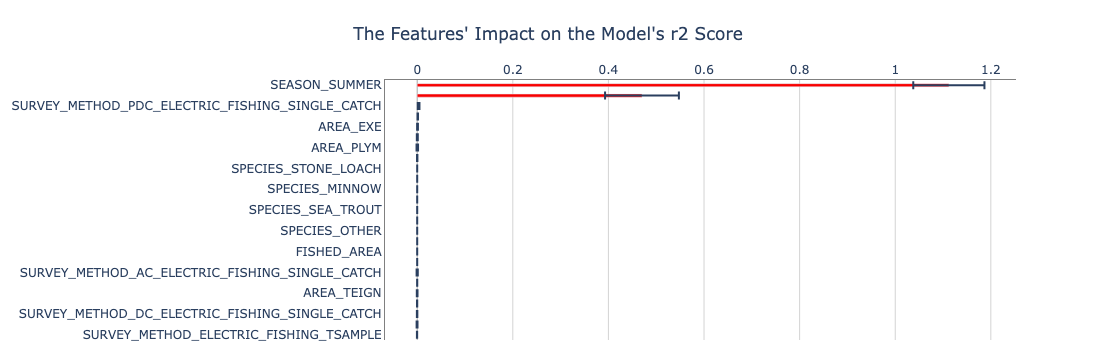

In [26]:
result_explain_model_default.show_in_notebook()

## Assess Model Fit

Likewise, we can accelerate evaluation metrics. Our test MSE is 0.45. This suggests we have a lower (better) RMSE than our hand-crafted regression model.

In [27]:
from ads.common.model import ADSModel
from ads.common.data import ADSData
from ads.evaluations.evaluator import ADSEvaluator

In [28]:
bin_est = ADSModel.from_estimator(est)

evaluator = ADSEvaluator(
    ADSData(X_test, y_test),
    models=[bin_est],
    training_data=ADSData(X_train, y_train),
)


print(evaluator.metrics)

[2025-04-01 11:13:33,332] [ads.common] ADSModel is being deprecated. Users should instead use GenericModel or one of its subclasses. More information here: https://accelerated-data-science.readthedocs.io/en/latest/user_guide/model_registration/introduction.html#register


,
r2_score,0.6630
mse,0.4530
mae,0.2800


,
r2_score,0.3958
mse,1.7223
mae,1.0093


## Deploy to Model Endpoint

We can deploy our model to an endpoint (i.e. run as a microservice accessed via REST). ADS allows us to quickly build the modelling artefacts, we cam then customise the `score.py` file to customise scoring. For our endpoint, we customise the scoring to transform the log prediction back to normal scale by exponenting it.

In [29]:
from ads.model import GenericModel
from ads.common.model_metadata import UseCaseType

In [53]:
ads.set_auth("resource_principal")
automl_model = GenericModel(estimator=est, artifact_dir="automl_model_artifact2")

[2025-04-01 12:36:40,854] [ads.common] In the future model input will be serialized by `cloudpickle` by default. Currently, model input are serialized into a dictionary containing serialized input data and original data type information.Set `model_input_serializer="cloudpickle"` to use cloudpickle model input serializer.


In [54]:
automl_model.prepare(inference_conda_env="automlx242_p38_cpu_x86_64_v1",
                     training_conda_env="automlx242_p38_cpu_x86_64_v1",
                     use_case_type=UseCaseType.REGRESSION,
                     X_sample=X_test,
                     force_overwrite=True)

algorithm: null
artifact_dir:
  /home/datascience/automl_model_artifact2:
  - - .model-ignore
    - model.pkl
    - score.py
    - input_schema.json
    - runtime.yaml
framework: null
model_deployment_id: null
model_id: null

We can verify the model, which runs the scorecode locally to debug any logic issues.

In [55]:
automl_model.verify(X_test[:3],auto_serialize_data=True)

Start loading model.pkl from model directory /home/datascience/automl_model_artifact2 ...
Model is successfully loaded.


{'prediction': [0.0, 0.0, 0.0]}

In [56]:
automl_model.reload()

Start loading model.pkl from model directory /home/datascience/automl_model_artifact2 ...
Model is successfully loaded.


algorithm: null
artifact_dir:
  /home/datascience/automl_model_artifact2:
  - - .model-ignore
    - model.pkl
    - score.py
    - input_schema.json
    - runtime.yaml
framework: null
model_deployment_id: null
model_id: null

In [57]:
model_id = automl_model.save(display_name='Fish Stock Regression Model')

Start loading model.pkl from model directory /home/datascience/automl_model_artifact2 ...
Model is successfully loaded.
['.model-ignore', 'model.pkl', 'score.py', 'input_schema.json', 'runtime.yaml']


loop1:   0%|          | 0/4 [00:00<?, ?it/s]

[2025-04-01 12:38:30,675] [ads.model.datascience_model] the JSON object must be str, bytes or bytearray, not Schema


When we deploy our model it will provision OCI resources for us. We can specify the compute shape etc. as well, or simply run .deploy() accepting defaults.

In [58]:
deploy = automl_model.deploy(display_name='Fish Stock Regression Model')


Model Deployment OCID: ocid1.datasciencemodeldeployment.oc1.eu-frankfurt-1.amaaaaaaeicj2tiahd4jwvailhkzjnmmkbmbo265ct3znozp3p4qyuavbboq


Creating model deployment:   0%|          | [00:00<?, ?it/s]

In [59]:
automl_model.predict(X_test.iloc[:2], auto_serialize_data=True)

{'prediction': [0.0, 0.0]}